In [16]:
print(__doc__)

Automatically created module for IPython interactive environment


In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
import pandas as pd

In [20]:
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\wrst_hist\\NHS_Seg_13.csv', header = None )

In [21]:
class_names = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\wrst_hist\\class_names.csv', header = None )

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [28]:
classifier = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight='balanced')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[668 188]
 [ 39 195]]


KeyboardInterrupt: 

In [14]:
y_pred = classifier.fit(X_train, y_train).predict(X_train)

Confusion matrix, without normalization
[[1619  365]
 [  87  472]]
Normalized confusion matrix
[[0.82 0.18]
 [0.16 0.84]]


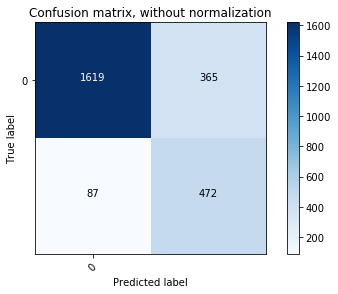

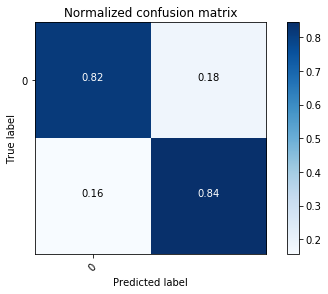

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
classifier = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight='balanced')
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [18]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.48


In [19]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

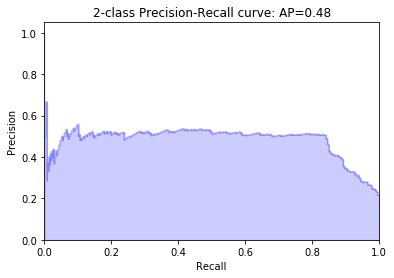

In [20]:
plt.show()

In [21]:
from sklearn import svm, feature_selection

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second ar

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


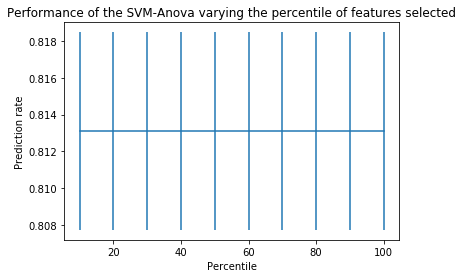

In [22]:
transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight='balanced'))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve

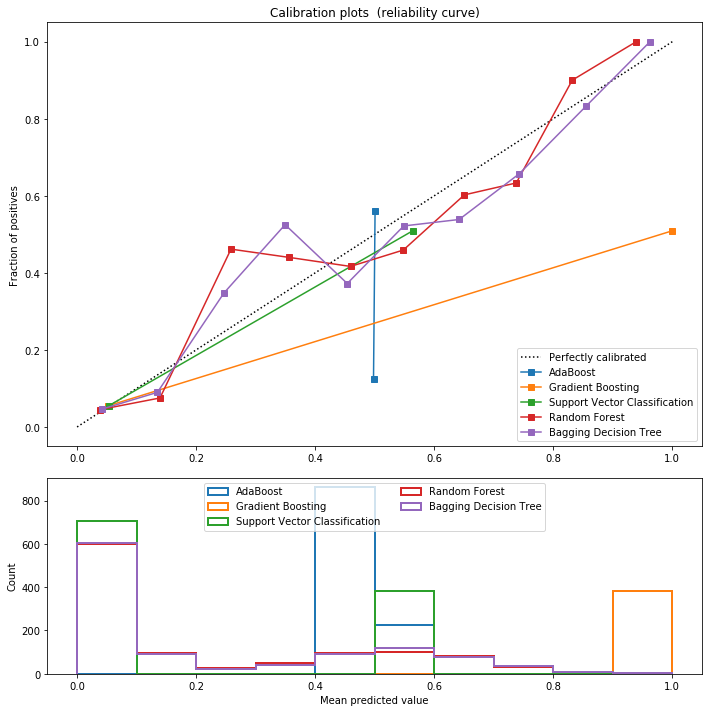

In [25]:
# Create classifiers

rfc = RandomForestClassifier (n_estimators = 1000, random_state= 0, n_jobs=1)
gb = GradientBoostingClassifier(n_estimators = 1000, random_state= 0, learning_rate=2.0, max_depth=1)
svc = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight='balanced')
ab = AdaBoostClassifier(n_estimators=1000, learning_rate=1, random_state= 0)
bdt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=None), 
                         n_estimators=1000, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=0)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(ab, 'AdaBoost'),
                  (gb, 'Gradient Boosting'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest'),
                  (bdt, 'Bagging Decision Tree')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


Random Forest:
	Brier: 0.120
	Precision: 0.562
	Recall: 0.538
	F1: 0.550

AdaBoost:
	Brier: 0.249
	Precision: 0.559
	Recall: 0.543
	F1: 0.551

AdaBoost + Isotonic:
	Brier: 0.123
	Precision: 0.609
	Recall: 0.333
	F1: 0.431

AdaBoost + Sigmoid:
	Brier: 0.128
	Precision: 0.679
	Recall: 0.162
	F1: 0.262

Random Forest:
	Brier: 0.120
	Precision: 0.562
	Recall: 0.538
	F1: 0.550

SVM:
	Brier: 0.123
	Precision: 0.509
	Recall: 0.833
	F1: 0.632

SVM + Isotonic:
	Brier: 0.123
	Precision: 0.507
	Recall: 0.782
	F1: 0.615

SVM + Sigmoid:
	Brier: 0.123
	Precision: 0.509
	Recall: 0.833
	F1: 0.632

Random Forest:
	Brier: 0.120
	Precision: 0.562
	Recall: 0.538
	F1: 0.550

GradientBoost:
	Brier: 0.206
	Precision: 0.509
	Recall: 0.833
	F1: 0.632

GradientBoost + Isotonic:
	Brier: 0.131
	Precision: 0.508
	Recall: 0.829
	F1: 0.630

GradientBoost + Sigmoid:
	Brier: 0.124
	Precision: 0.504
	Recall: 0.808
	F1: 0.621

Random Forest:
	Brier: 0.120
	Precision: 0.562
	Recall: 0.538
	F1: 0.550

Bagging Tree:
	Brier

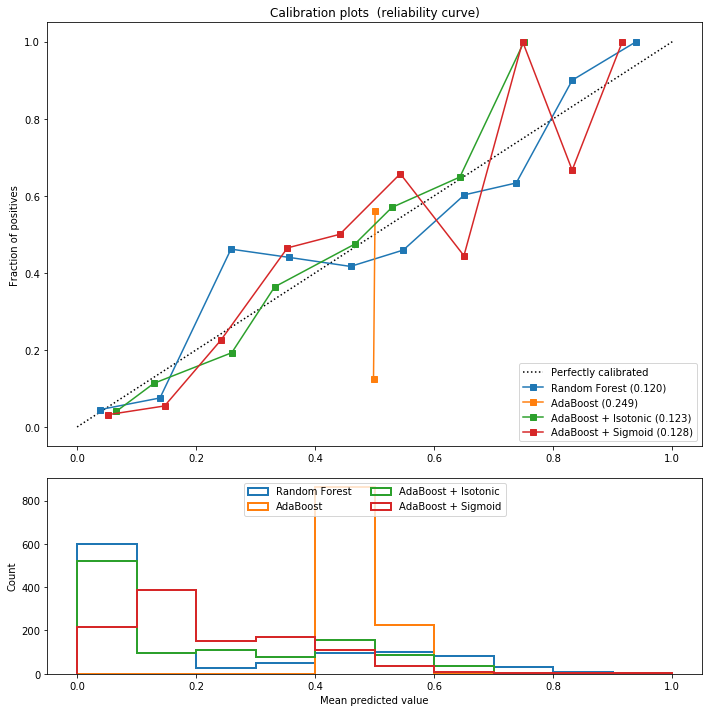

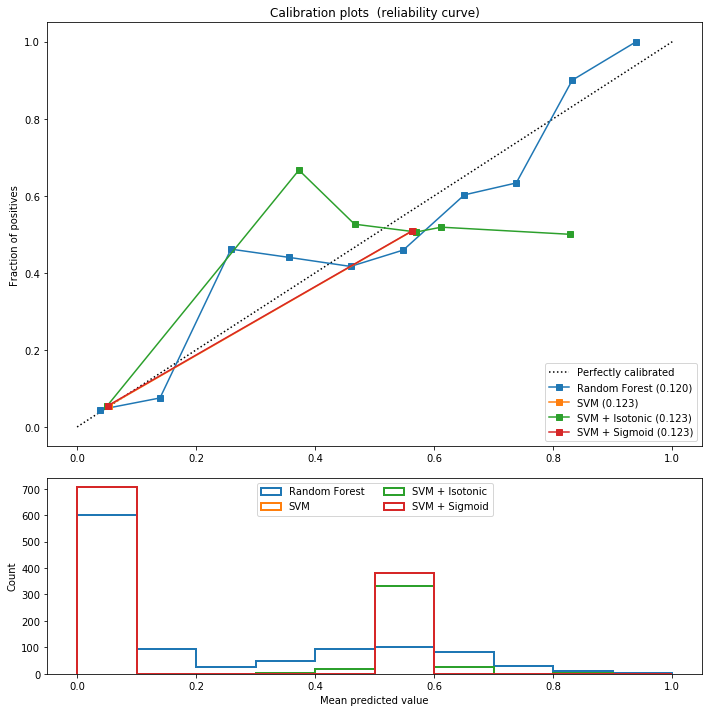

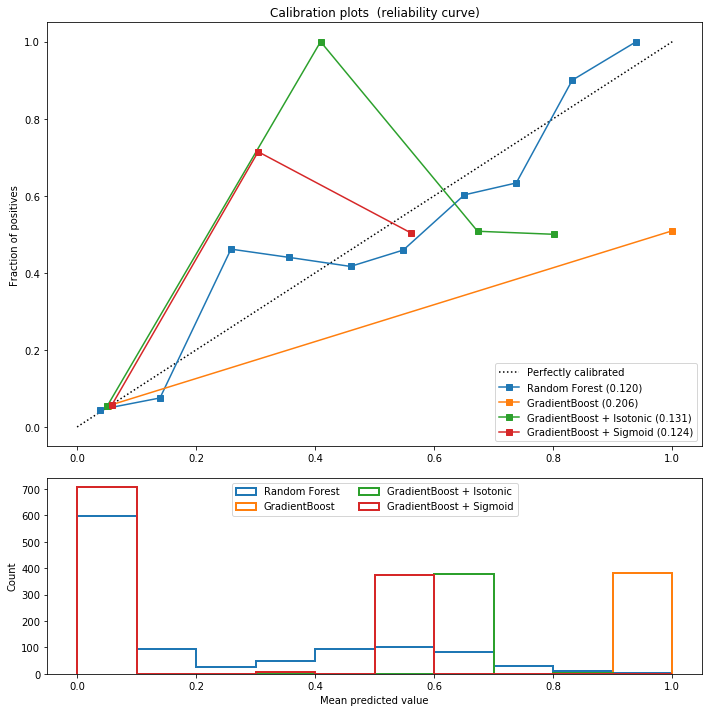

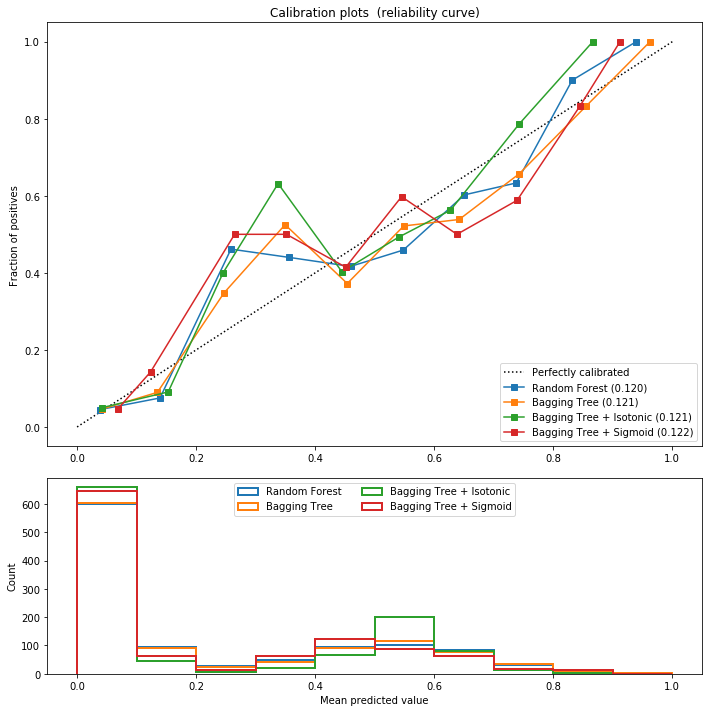

In [27]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    rfc = RandomForestClassifier (n_estimators = 1000, random_state= 0, n_jobs=1)
    #lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(rfc, 'Random Forest'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for AdaBoost
plot_calibration_curve(AdaBoostClassifier(n_estimators=1000, learning_rate=1, random_state= 0), "AdaBoost", 1)

# Plot calibration curve for SVM
plot_calibration_curve(SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight='balanced'), "SVM", 2)

# Plot calibration curve for GradientBoosting
plot_calibration_curve (GradientBoostingClassifier(n_estimators = 1000, random_state= 0, learning_rate=2.0, max_depth=1), "GradientBoost", 3)

# Plot calibration curve for Bagging
plot_calibration_curve(BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=None), 
                         n_estimators=1000, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=0), "Bagging Tree", 4)


plt.show()

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

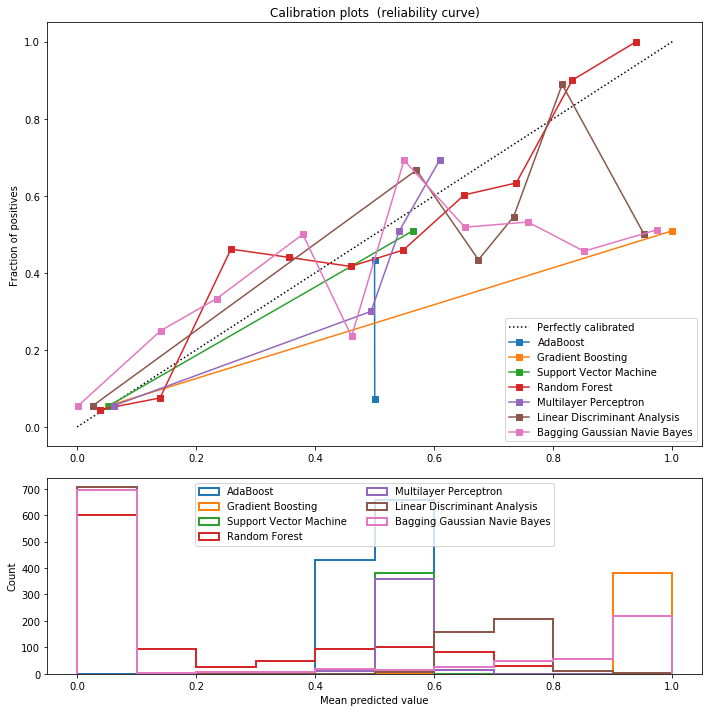

In [29]:
# Create classifiers

rfc = RandomForestClassifier (n_estimators = 1000, random_state= 0, n_jobs=1)
gbc = GradientBoostingClassifier(n_estimators = 1000, random_state= 0, learning_rate=2.0, max_depth=1)
svc = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
abc  = AdaBoostClassifier(n_estimators=1000, learning_rate=2.0, random_state= 0)
mlp = MLPClassifier(alpha=1)
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=False, tol=0.0001)
bgnb= BaggingClassifier(GaussianNB(), n_estimators=1000, bootstrap = False, bootstrap_features = True, n_jobs = 1)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(abc, 'AdaBoost'),
                  (gbc, 'Gradient Boosting'),
                  (svc, 'Support Vector Machine'),
                  (rfc, 'Random Forest'),
                  (mlp, 'Multilayer Perceptron'),
                  (lda, 'Linear Discriminant Analysis'),
                  (bgnb, 'Bagging Gaussian Navie Bayes')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

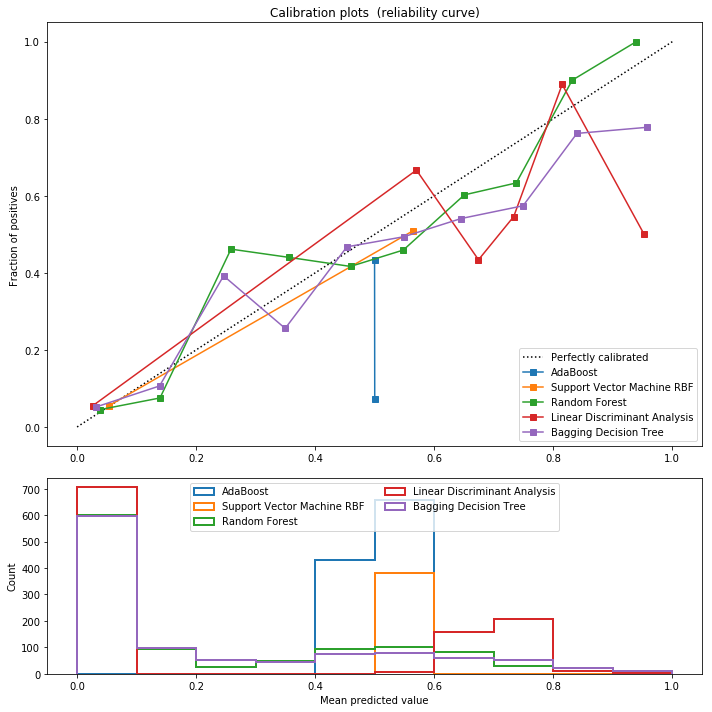

In [40]:
# Create classifiers

rfc = RandomForestClassifier (n_estimators = 1000, random_state= 0, n_jobs=1)
svc = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
abc  = AdaBoostClassifier(n_estimators=1000, learning_rate=2.0, random_state= 0)
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=False, tol=0.0001)
bgnb= BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=None), 
                         n_estimators=1000, max_samples=1.0,  bootstrap = False, bootstrap_features = True, random_state=0)

# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(abc, 'AdaBoost'),
                  (svc, 'Support Vector Machine RBF'),
                  (rfc, 'Random Forest'),
                  (lda, 'Linear Discriminant Analysis'),
                  (bgnb, 'Bagging Decision Tree')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()